In [1548]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

In [1549]:
train_df = pd.read_csv("../../datasets/LoanPrediction/train.csv")
test_df = pd.read_csv("../../datasets/LoanPrediction/test.csv")
submission_df = pd.read_csv("../../datasets/LoanPrediction/sample_submission.csv")

In [1550]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1551]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [1552]:
submission_df.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [1553]:
train_df.shape

(614, 13)

In [1554]:
test_df.shape

(367, 12)

In [1555]:
train_df.columns.difference(test_df.columns)

Index(['Loan_Status'], dtype='object')

### Let's analyze the Target variable
The data represents loan approval ration of 70%

In [1556]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

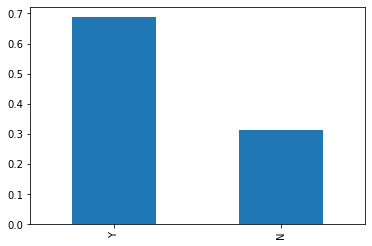

In [1557]:
train_df['Loan_Status'].value_counts(dropna=False, normalize=True).plot(kind='bar')

In [1558]:
train_df.duplicated().sum()

0

In [1559]:
test_df.duplicated().sum()

0

In [1560]:
pd.concat([train_df,test_df]).duplicated().sum()

0

In [1561]:
train_df['source'] = 'train'
test_df['source'] = 'test'

In [1562]:
df = pd.concat([train_df,test_df],axis=0)

In [1563]:
df.reset_index(inplace=True, drop=True)

In [1564]:
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1})

<AxesSubplot:>

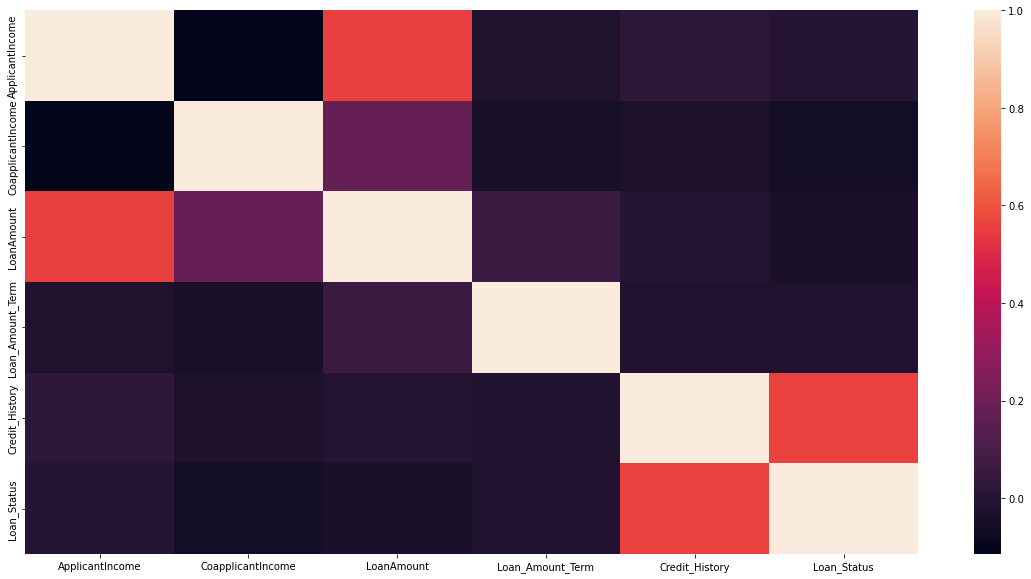

In [1565]:
plot.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [1566]:
df.shape

(981, 14)

In [1567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    float64
 13  source             981 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 107.4+ KB


In [1568]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [1569]:
df.describe(include='object').T

,count,unique,top,freq
Loan_ID,981,981,LP001002,1
Gender,957,2,Male,775
Married,978,2,Yes,631
Dependents,956,4,0,545
Education,981,2,Graduate,763
Self_Employed,926,2,No,807
Property_Area,981,3,Semiurban,349
source,981,2,train,614


In [1570]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.0,1.0


### Univeriate analysis for independent categorical nomial features like : Gender, Married, Self_Employed, Credit_history, 
1. 80% of the population are male
2. 65% are married
3. 75% has good credit history ( repayed the loans)

In [1571]:
df['Gender'].value_counts(dropna=False)

Male      775
Female    182
NaN        24
Name: Gender, dtype: int64

<AxesSubplot:>

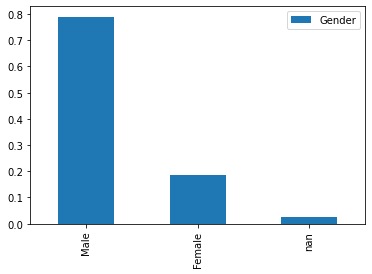

In [1572]:
df['Gender'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

In [1573]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0,np.NaN:1})

In [1574]:
df['Married'].value_counts(dropna=False)

Yes    631
No     347
NaN      3
Name: Married, dtype: int64

<AxesSubplot:>

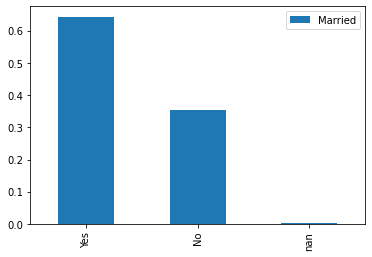

In [1575]:
df['Married'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

In [1576]:
df['Married'] = df['Married'].map({'Yes':1,'No':0,np.NaN:1})

In [1577]:
df['Self_Employed'].value_counts(dropna=False)

No     807
Yes    119
NaN     55
Name: Self_Employed, dtype: int64

<AxesSubplot:>

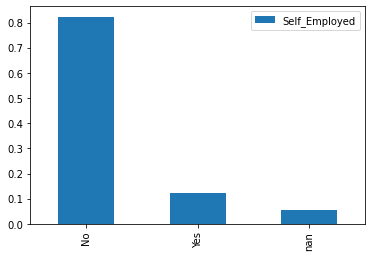

In [1578]:
df['Self_Employed'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

In [1579]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0, np.NaN:0})

In [1580]:
df['Credit_History'].value_counts(dropna=False)

1.0    754
0.0    148
NaN     79
Name: Credit_History, dtype: int64

<AxesSubplot:>

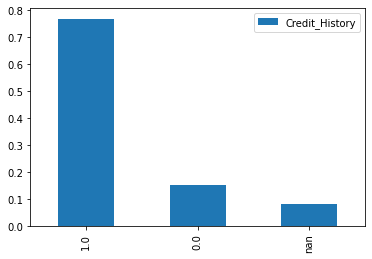

In [1581]:
df['Credit_History'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

In [1582]:
df['Credit_History'].mode()[0]

1.0

In [1583]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [1584]:
df['Credit_History'].value_counts(dropna=False)

1.0    833
0.0    148
Name: Credit_History, dtype: int64

### Univeriate analysis for independent categorical ordinal features like : Dependents, Education, Property_Area
1. 60% of the population dont have  any dependents
2. 75% are Graduates
3. property types are in equal ration

In [1585]:
df['Dependents'].value_counts(dropna=False)

0      545
1      160
2      160
3+      91
NaN     25
Name: Dependents, dtype: int64

<AxesSubplot:>

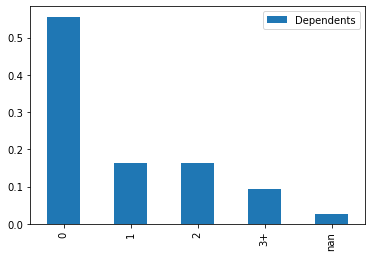

In [1586]:
df['Dependents'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

In [1587]:
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3,np.NaN:0})

In [1588]:
df['Dependents'].value_counts(dropna=False)

0    570
1    160
2    160
3     91
Name: Dependents, dtype: int64

<AxesSubplot:>

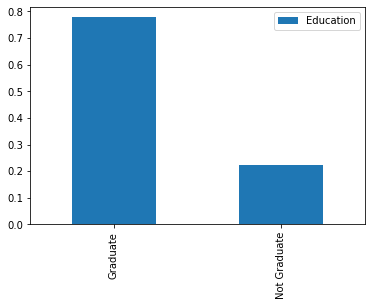

In [1589]:
df['Education'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

In [1590]:
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})

In [1591]:
df['Property_Area'].value_counts(dropna=False)

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

<AxesSubplot:>

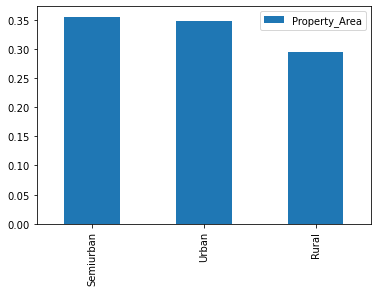

In [1592]:
df['Property_Area'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

In [1593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int64  
 2   Married            981 non-null    int64  
 3   Dependents         981 non-null    int64  
 4   Education          981 non-null    int64  
 5   Self_Employed      981 non-null    int64  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    float64
 13  source             981 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 107.4+ KB


#### Univeriate analysis for independent numberical features like : ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term
1. LoanAmount is normally distributed but has more outliers
2. Applicants income is hight tends towards left and lot of outliers. Income  of Graduates have more outliers.
3. CoapplicantIncome has same issues as Applicants income

<AxesSubplot:>

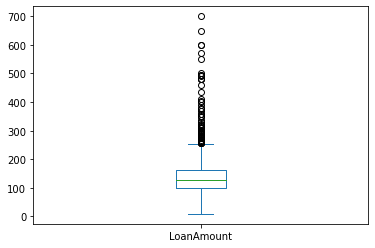

In [1594]:
df['LoanAmount'].plot(kind='box')

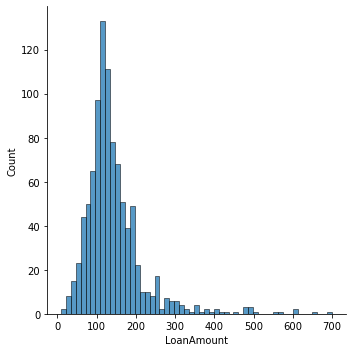

In [1595]:
sns.displot(df['LoanAmount'])

In [1596]:
df['LoanAmount'].mean(), df['LoanAmount'].median()

(142.51153039832286, 126.0)

In [1597]:
df['LoanAmount'].median()

126.0

In [1598]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

/home/kiran/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

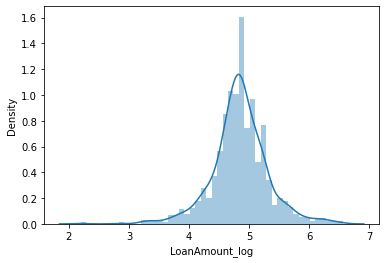

In [1599]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_log'])

<AxesSubplot:>

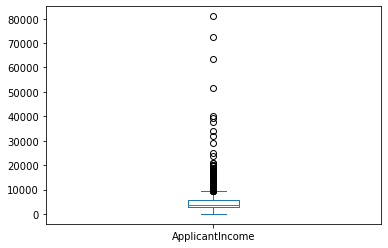

In [1600]:
df['ApplicantIncome'].plot(kind='box')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

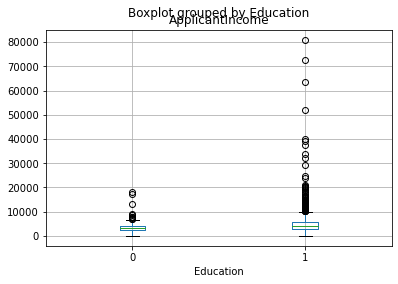

In [1601]:
df.boxplot(column='ApplicantIncome', by='Education')

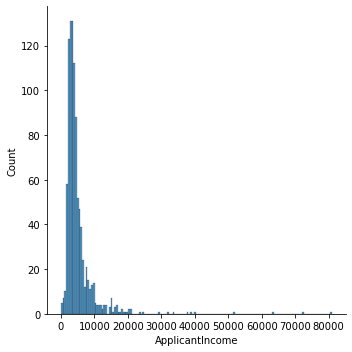

In [1602]:
sns.displot(df['ApplicantIncome'])

<AxesSubplot:>

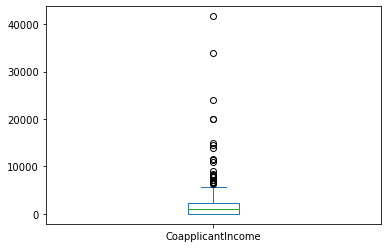

In [1603]:
df['CoapplicantIncome'].plot(kind='box')

/home/kiran/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

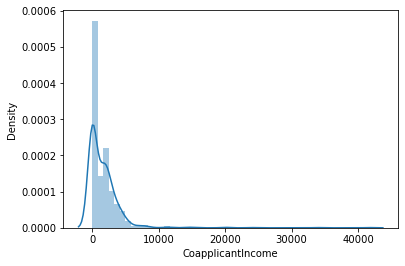

In [1604]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:ylabel='Frequency'>

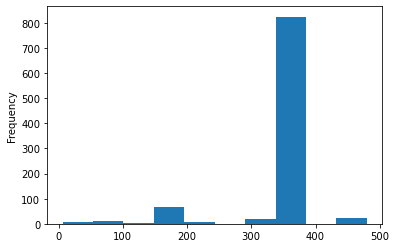

In [1605]:
df['Loan_Amount_Term'].plot(kind='hist')

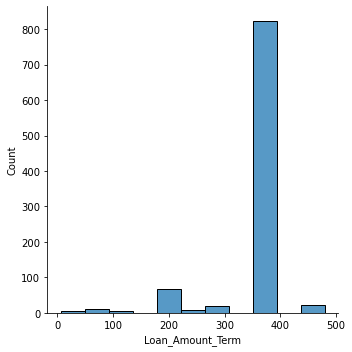

In [1606]:
sns.displot(df['Loan_Amount_Term'])

In [1607]:
df['Loan_Amount_Term'].mean(), df['Loan_Amount_Term'].median(), df['Loan_Amount_Term'].mode()[0]

(342.2018730489074, 360.0, 360.0)

In [1608]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [1609]:
df['Loan_Amount_Term'].value_counts()

360.0    843
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

### Let's do bivariate analysis to check on our Hypothesis.
1. Applicants with more incomes should have more chances of loan approval
2. Applicants with good credit history will have more chances of loan approval.
3. Loan approval also depends on loan amount. If loan amount is less then approval chances are high.
4. Loan_amount_Term is high then EMI amount will be less, hence high chances of repayment such that more chances of loan approval.

### Categorical independent variable vs Target Variable (  Gender, Married, Self_Employed, Education, Credit_history, Dependents, Education, Property_Area)
1. Male and Female both have same chance of loan approval ration
2. Unmarried people has little higher chances of getting the loan approved
3. Employment type don't have any impact
4. Good credit history is very much important
5. Graduates have little more chances of getting the loan approval.
6. sub urban properties have more chances of loan approval when compare to others.
7. dependents don't have much importance in loan approval

<AxesSubplot:xlabel='Gender'>

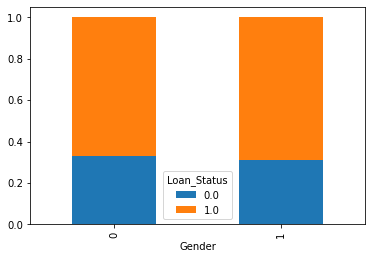

In [1610]:
gender = pd.crosstab(df['Gender'],df['Loan_Status'])
gender.div(gender.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Married'>

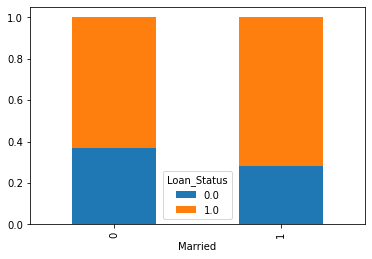

In [1611]:
Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Self_Employed'>

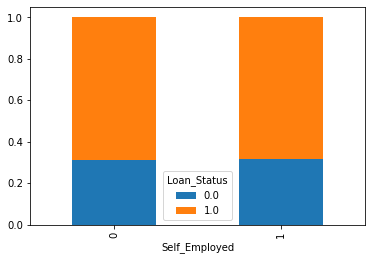

In [1612]:
Self_Employed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Credit_History'>

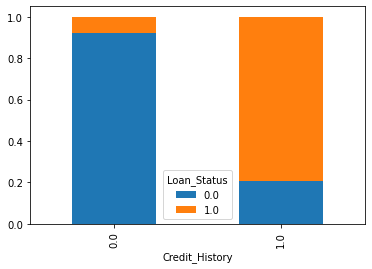

In [1613]:
Credit_History = pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Education'>

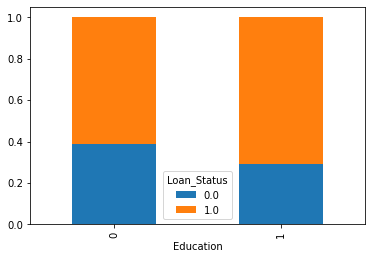

In [1614]:
Education = pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Dependents'>

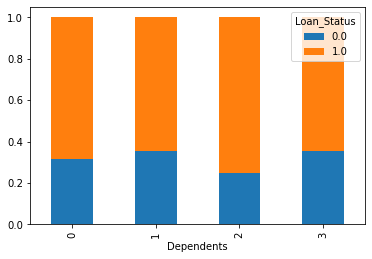

In [1615]:
Dependents = pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Property_Area'>

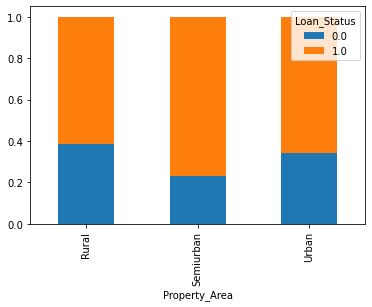

In [1616]:
Property_Area = pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

### Numerical dependent variable vs Target variable
1. Applicants income doesn't have any impact on loan getting success.
2. if co applicant income is low, high chances of loan getting approved. 
3. Total income : if income is medium range, high chances of getting loadn approval
4. Low and Medium loan amounts have higher chances of getting loadn approved

<AxesSubplot:xlabel='Loan_Status'>

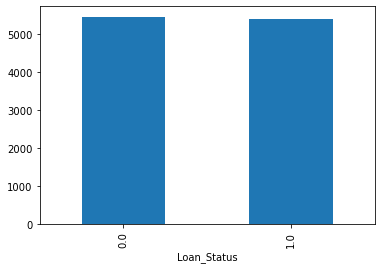

In [1617]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [1618]:
df['ApplicantIncome'].max()

81000

In [1619]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Medium','High','Very High']
df['income_slabs'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

<AxesSubplot:xlabel='income_slabs'>

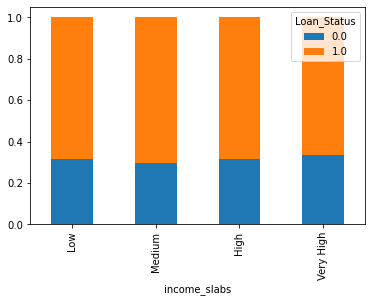

In [1620]:
income_slabs = pd.crosstab(df['income_slabs'],df['Loan_Status'])
income_slabs.div(income_slabs.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

In [1621]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Medium','High','Very High']
df['Capplicant_income_slabs'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

<AxesSubplot:xlabel='Capplicant_income_slabs'>

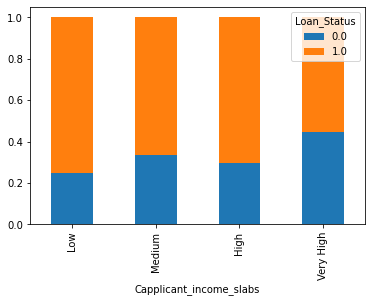

In [1622]:
Capplicant_income_slabs = pd.crosstab(df['Capplicant_income_slabs'],df['Loan_Status'])
Capplicant_income_slabs.div(Capplicant_income_slabs.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

In [1623]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Medium','High','Very High']
df['Total_income_slabs'] = pd.cut(df['Total_income'],bins,labels=group)

<AxesSubplot:xlabel='Total_income_slabs'>

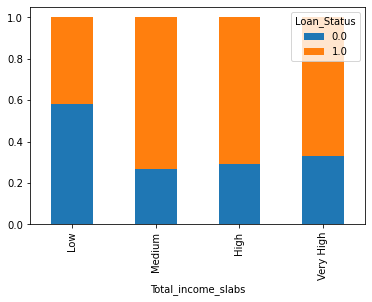

In [1624]:
Total_income_slabs = pd.crosstab(df['Total_income_slabs'],df['Loan_Status'])
Total_income_slabs.div(Total_income_slabs.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

In [1625]:
df['LoanAmount'].describe()

count    981.000000
mean     142.057085
std       76.395592
min        9.000000
25%      101.000000
50%      126.000000
75%      160.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [1626]:
bins = [0,100,200,700]
group = ['Low','Medium','High']
df['LoanAmount_slabs'] = pd.cut(df['LoanAmount'],bins,labels=group)

<AxesSubplot:xlabel='LoanAmount_slabs'>

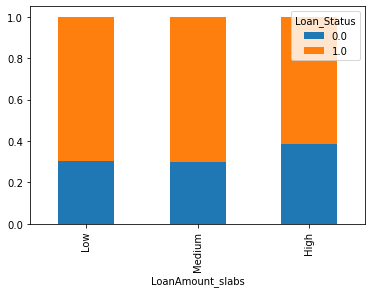

In [1627]:
LoanAmount = pd.crosstab(df['LoanAmount_slabs'],df['Loan_Status'])
LoanAmount.div(LoanAmount.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

In [1628]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'source', 'LoanAmount_log', 'income_slabs', 'Capplicant_income_slabs',
       'Total_income', 'Total_income_slabs', 'LoanAmount_slabs'],
      dtype='object')

In [1629]:
df.drop(columns=['income_slabs', 'Capplicant_income_slabs', 'Total_income',
       'Total_income_slabs', 'LoanAmount_slabs','LoanAmount'],inplace=True)

<AxesSubplot:>

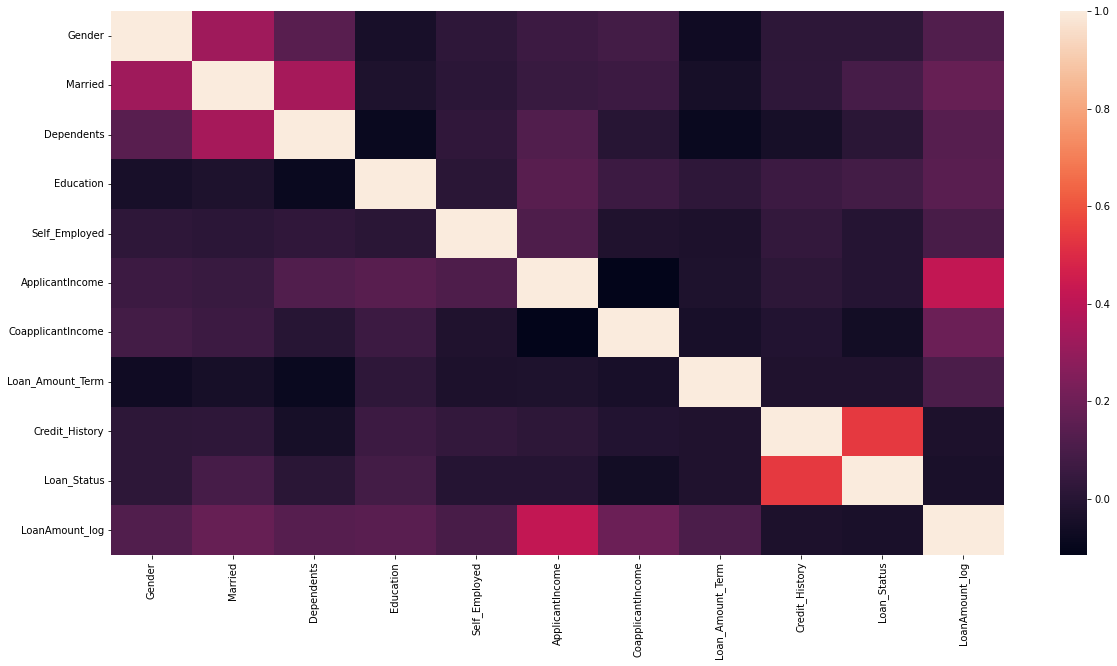

In [1630]:
plot.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [1631]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'source', 'LoanAmount_log'],
      dtype='object')

In [1632]:
df_cat = df.select_dtypes(include='object')
df_cat

,Loan_ID,Property_Area,source
0,LP001002,Urban,train
1,LP001003,Rural,train
2,LP001005,Urban,train
3,LP001006,Urban,train
4,LP001008,Urban,train
...,...,...,...
976,LP002971,Urban,test
977,LP002975,Urban,test
978,LP002980,Semiurban,test
979,LP002986,Rural,test


In [1633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int64  
 2   Married            981 non-null    int64  
 3   Dependents         981 non-null    int64  
 4   Education          981 non-null    int64  
 5   Self_Employed      981 non-null    int64  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    float64
 12  source             981 non-null    object 
 13  LoanAmount_log     981 non-null    float64
dtypes: float64(5), int64(6), object(3)
memory usage: 107.4+ KB


In [1634]:
df_categorical = df[['Property_Area']]
df_cat_conv = pd.get_dummies(df_categorical)

In [1635]:
df_cat_conv.head().T

,0,1,2,3,4
Property_Area_Rural,0,1,0,0,0
Property_Area_Semiurban,0,0,0,0,0
Property_Area_Urban,1,0,1,1,1


In [1636]:
df_cat_conv.columns

Index(['Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [1637]:
df = pd.concat([df, df_cat_conv],axis=1)

In [1638]:
cat_col = ['Property_Area']

In [1639]:
df.drop(columns=cat_col, inplace=True)

In [1640]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,source,LoanAmount_log,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,360.0,1.0,1.0,train,4.836282,0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,360.0,1.0,0.0,train,4.852030,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,360.0,1.0,1.0,train,4.189655,0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,360.0,1.0,1.0,train,4.787492,0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,360.0,1.0,1.0,train,4.948760,0,0,1


In [1641]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount_log','Loan_Amount_Term']]

,ApplicantIncome,CoapplicantIncome,LoanAmount_log,Loan_Amount_Term
0,5849,0.0,4.836282,360.0
1,4583,1508.0,4.852030,360.0
2,3000,0.0,4.189655,360.0
3,2583,2358.0,4.787492,360.0
4,6000,0.0,4.948760,360.0
...,...,...,...,...
976,4009,1777.0,4.727388,360.0
977,4158,709.0,4.744932,360.0
978,3250,1993.0,4.836282,360.0
979,5000,2393.0,5.062595,360.0


In [1642]:
tobescaled_df = df[['ApplicantIncome','CoapplicantIncome','LoanAmount_log','Loan_Amount_Term']]
sc = StandardScaler()
#sc = MinMaxScaler()
scaled_df = sc.fit_transform(tobescaled_df)

In [1643]:

df[['ApplicantIncome','CoapplicantIncome','LoanAmount_log','Loan_Amount_Term']] = scaled_df

In [1644]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount_log','Loan_Amount_Term']].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount_log,Loan_Amount_Term
0,0.117565,-0.589506,-0.019991,0.270528
1,-0.104844,-0.034561,0.013695,0.270528
2,-0.382944,-0.589506,-1.403126,0.270528
3,-0.456202,0.278239,-0.124353,0.270528
4,0.144093,-0.589506,0.220599,0.270528


In [1645]:
train_df = df[df['source']=='train']
test_df = df[df['source']=='test']
test_df.reset_index(inplace=True, drop=True)
train_df.reset_index(inplace=True, drop=True)

In [1646]:
train_df['Loan_Status'].value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

#### We could see 0 and 1 samples are not equal, let's try to over sable the promoted =1 rows

In [1648]:
loan = train_df[train_df['Loan_Status'] == 1]
no_loan = train_df[train_df['Loan_Status'] == 0]

In [1649]:
loan.shape, no_loan.shape

((422, 16), (192, 16))

In [1650]:
no_loan = no_loan.sample(loan.shape[0], replace=True)
no_loan.shape

(422, 16)

In [1651]:
train_df = pd.concat([loan, no_loan],axis=0)

In [1652]:
train_df.shape

(844, 16)

In [1653]:
X = train_df.drop(columns=['source','Loan_ID','Loan_Status'])
y = train_df['Loan_Status']

In [1654]:
y.unique()

array([1., 0.])

In [1655]:
df.corr().T

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Gender,1.000000,0.327012,0.139248,-0.040649,0.024719,0.060444,0.082428,-0.069058,0.018627,0.017987,0.123055,0.067824,-0.094498,0.029989
Married,0.327012,1.000000,0.344291,-0.026211,0.013666,0.052126,0.061606,-0.047505,0.021738,0.091478,0.180598,-0.001967,-0.006909,0.008825
Dependents,0.139248,0.344291,1.000000,-0.084894,0.026241,0.122136,0.003223,-0.084190,-0.045335,0.010118,0.134937,-0.014311,-0.003900,0.017622
Education,-0.040649,-0.026211,-0.084894,1.000000,0.010848,0.138909,0.060380,0.021575,0.062416,0.085884,0.143129,-0.051345,0.013089,0.036017
Self_Employed,0.024719,0.013666,0.026241,0.010848,1.000000,0.113106,-0.018861,-0.031451,0.034485,-0.003700,0.096043,0.060360,-0.015231,-0.042498
ApplicantIncome,0.060444,0.052126,0.122136,0.138909,0.113106,1.000000,-0.114247,-0.023823,0.020201,-0.004710,0.417236,-0.000099,-0.009034,0.009171
CoapplicantIncome,0.082428,0.061606,0.003223,0.060380,-0.018861,-0.114247,1.000000,-0.042750,-0.011531,-0.059187,0.193742,0.035925,-0.026793,-0.007484
Loan_Amount_Term,-0.069058,-0.047505,-0.084190,0.021575,-0.031451,-0.023823,-0.042750,1.000000,-0.021495,-0.022549,0.104715,0.019765,0.031152,-0.050222
Credit_History,0.018627,0.021738,-0.045335,0.062416,0.034485,0.020201,-0.011531,-0.021495,1.000000,0.540556,-0.030598,-0.026518,0.009830,0.015517
Loan_Status,0.017987,0.091478,0.010118,0.085884,-0.003700,-0.004710,-0.059187,-0.022549,0.540556,1.000000,-0.037536,-0.100694,0.136540,-0.043621


In [1656]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=10)
#X_train = X
#y_test = y

In [1657]:
X_train.head().T

,260,82,349,64,206
Gender,1.000000,0.000000,1.000000,0.000000,0.000000
Married,1.000000,1.000000,1.000000,0.000000,0.000000
Dependents,1.000000,2.000000,0.000000,0.000000,0.000000
Education,1.000000,1.000000,1.000000,1.000000,1.000000
Self_Employed,0.000000,0.000000,0.000000,0.000000,0.000000
ApplicantIncome,0.158674,-0.667895,-0.448824,-0.178102,-0.340078
CoapplicantIncome,0.974496,0.102703,1.710498,-0.589506,-0.589506
Loan_Amount_Term,0.270528,0.270528,0.270528,0.270528,0.270528
Credit_History,1.000000,1.000000,1.000000,0.000000,1.000000
LoanAmount_log,2.039460,0.582591,0.824543,-0.196868,-0.991643


In [1658]:
y_test

489    0.0
596    0.0
585    0.0
384    0.0
508    1.0
391    1.0
71     1.0
197    1.0
583    0.0
Name: Loan_Status, dtype: float64

In [1659]:
X_train.shape, y_train.shape

((835, 13), (835,))

In [1660]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [1661]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [1662]:
accuracy_score(y_train, y_train_pred)

0.7365269461077845

In [1663]:
accuracy_score(y_test, y_test_pred)

0.4444444444444444

In [1664]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[245, 172],
       [ 48, 370]])

In [1665]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[1, 4],
       [1, 3]])

In [1666]:
report_train = classification_report(y_train, y_train_pred)
print(report_train)

              precision    recall  f1-score   support

         0.0       0.84      0.59      0.69       417
         1.0       0.68      0.89      0.77       418

    accuracy                           0.74       835
   macro avg       0.76      0.74      0.73       835
weighted avg       0.76      0.74      0.73       835



In [1667]:
report_test = classification_report(y_test, y_test_pred)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29         5
         1.0       0.43      0.75      0.55         4

    accuracy                           0.44         9
   macro avg       0.46      0.47      0.42         9
weighted avg       0.47      0.44      0.40         9



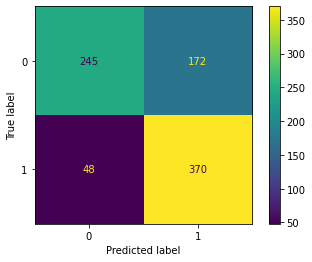

In [1668]:
ConfusionMatrixDisplay(cm_train).plot()

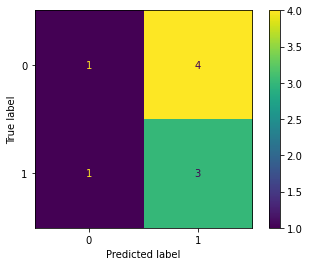

In [1669]:
ConfusionMatrixDisplay(cm_test).plot()

In [1670]:
X = test_df.drop(columns=['source','Loan_ID','Loan_Status'])

In [1671]:
y_pred = model.predict(X)

In [1672]:
pd.Series(y_pred).value_counts(dropna=False)

1.0    269
0.0     98
dtype: int64

In [1673]:
submission_df.head() 

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [1678]:
X.head().T

,0,1,2,3,4
Gender,1.000000,1.000000,1.000000,1.000000,1.000000
Married,1.000000,1.000000,1.000000,1.000000,0.000000
Dependents,0.000000,1.000000,2.000000,2.000000,0.000000
Education,1.000000,1.000000,1.000000,1.000000,0.000000
Self_Employed,0.000000,0.000000,0.000000,0.000000,0.000000
ApplicantIncome,0.094903,-0.369593,-0.031586,-0.498892,-0.334457
CoapplicantIncome,-0.589506,-0.037505,0.072895,0.347423,-0.589506
Loan_Amount_Term,0.270528,0.270528,0.270528,0.270528,0.270528
Credit_History,1.000000,1.000000,1.000000,1.000000,1.000000
LoanAmount_log,-0.310470,-0.019991,1.052196,-0.514339,-1.045797


In [1674]:
output = pd.DataFrame()
output['Loan_ID'] = test_df['Loan_ID']
output['Loan_Status'] = pd.Series((y_pred)).map({0:'N',1:'Y'})

In [1675]:
output.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [1676]:
output.to_csv("LogisticRegression_LoanPrediction-output/LoanPrediction.csv", index=False)